---------------------- 
Below is the gate version of the circuit of interest
---------------------- 
Below is the pyZX plot of the converted circuit


---------------------- 
Below is the JCZ data (converted from circuit with 4 qubits) 
 [<JCZCircuit.JGate object at 0x2b170fbd0>, <JCZCircuit.JGate object at 0x2b1f24510>, <JCZCircuit.JGate object at 0x2b1f24550>, <JCZCircuit.JGate object at 0x2b2f2dfd0>, <JCZCircuit.CZGate object at 0x2b1366410>, <JCZCircuit.JGate object at 0x168b9e3d0>, <JCZCircuit.JGate object at 0x2b2754fd0>, <JCZCircuit.CZGate object at 0x12fd662d0>, <JCZCircuit.JGate object at 0x2b2784650>, <JCZCircuit.JGate object at 0x2b27d48d0>, <JCZCircuit.CZGate object at 0x2b1123790>, <JCZCircuit.JGate object at 0x2b1c70bd0>]
---------------------- 
Now executing the optimisation on the JCZ... 
 

Folder 'layers/' has been emptied.
--------------- 
Currently generate_graph_state, Below is JCZ conversion in pyZX graph


-------------- 
Below is the JCZ pyZX in graph form


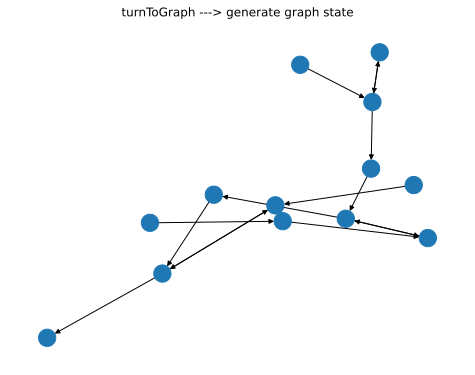

-------------- 
Below is the JCZ pyZX after additional details have been assigned


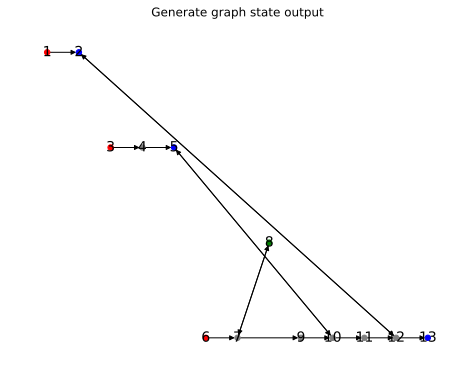

shift signal finished
-------------- 
Below is determine_dependency result


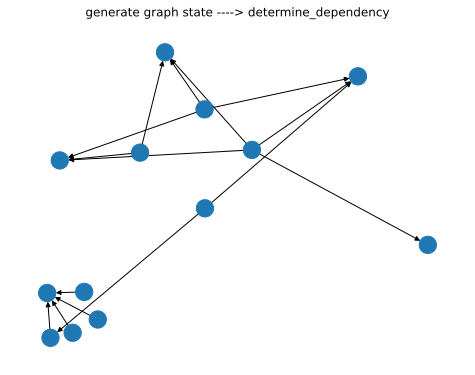

-------------- 
Below is undirected_graph result


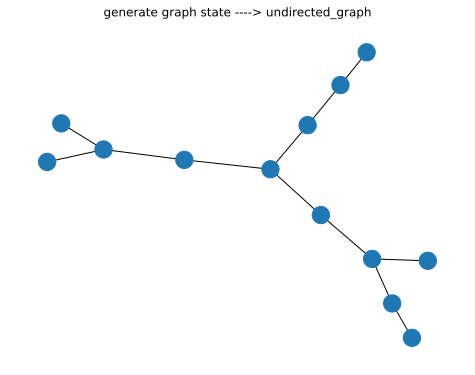

MAX DEGREE WAS LESS THAN 2
MAX DEGREE WAS LESS THAN 2
Retry #0
MAX DEGREE WAS LESS THAN 2
Retry #1
MAX DEGREE WAS LESS THAN 2
Retry #2
MAX DEGREE WAS LESS THAN 2
Retry #3
fusion connected qubits validation success!
Retry #4
--------------
Below is randomised resource_state 


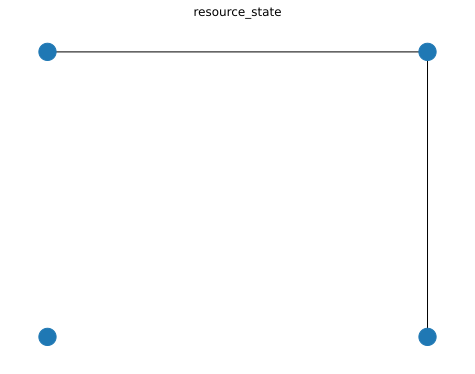

--------------
Below undirected_graph + resource_state = fusion graph AKA pre_graph 
Graph with 17 nodes and 17 edges


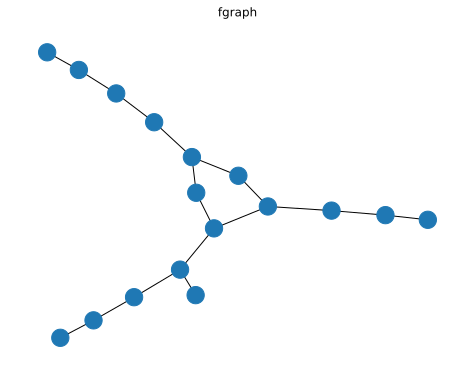

--------------
Below fgraph & dgraph & rs input to map & route 
8 8


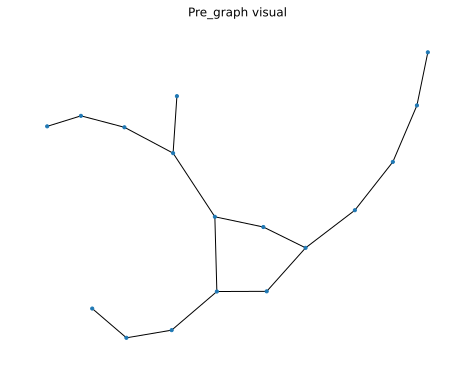

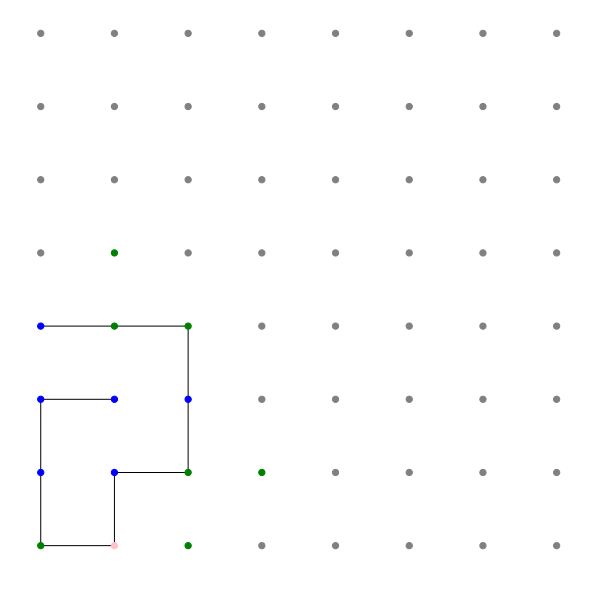

11
8 8


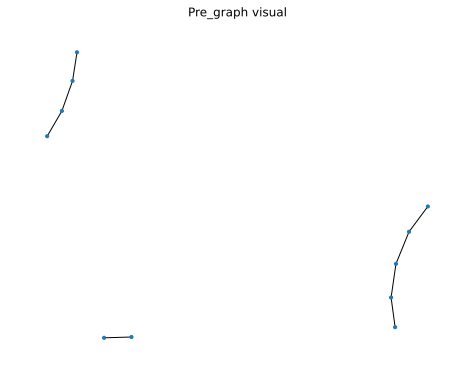

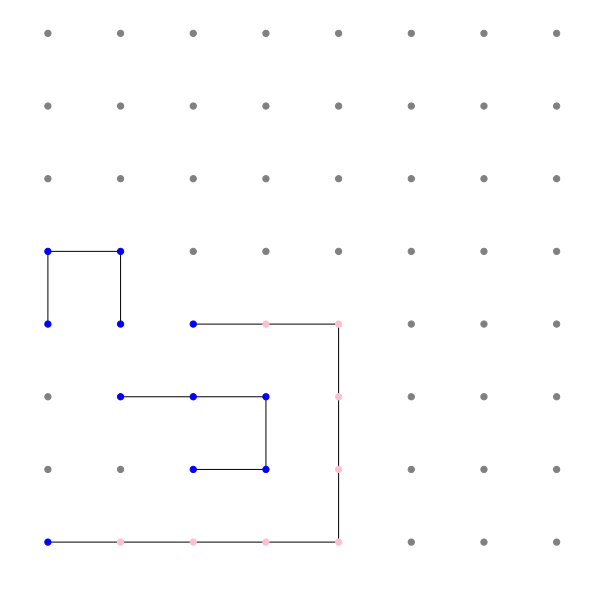

0
17 nodes
2 layers
fusion: 26
connect qubits validation success!
[<networkx.classes.graph.Graph object at 0x169570750>, <networkx.classes.graph.Graph object at 0x169513690>]
[{0: (0, 0), 1: (1, 0), 2: (2, 0), 3: (3, 0), 4: (4, 0), 5: (5, 0), 6: (6, 0), 7: (7, 0), 8: (0, 1), 9: (1, 1), 10: (2, 1), 11: (3, 1), 12: (4, 1), 13: (5, 1), 14: (6, 1), 15: (7, 1), 16: (0, 2), 17: (1, 2), 18: (2, 2), 19: (3, 2), 20: (4, 2), 21: (5, 2), 22: (6, 2), 23: (7, 2), 24: (0, 3), 25: (1, 3), 26: (2, 3), 27: (3, 3), 28: (4, 3), 29: (5, 3), 30: (6, 3), 31: (7, 3), 32: (0, 4), 33: (1, 4), 34: (2, 4), 35: (3, 4), 36: (4, 4), 37: (5, 4), 38: (6, 4), 39: (7, 4), 40: (0, 5), 41: (1, 5), 42: (2, 5), 43: (3, 5), 44: (4, 5), 45: (5, 5), 46: (6, 5), 47: (7, 5), 48: (0, 6), 49: (1, 6), 50: (2, 6), 51: (3, 6), 52: (4, 6), 53: (5, 6), 54: (6, 6), 55: (7, 6), 56: (0, 7), 57: (1, 7), 58: (2, 7), 59: (3, 7), 60: (4, 7), 61: (5, 7), 62: (6, 7), 63: (7, 7)}, {0: (0, 0), 26: (2, 3), 10: (2, 1), 11: (3, 1), 25: (1, 3), 33: 

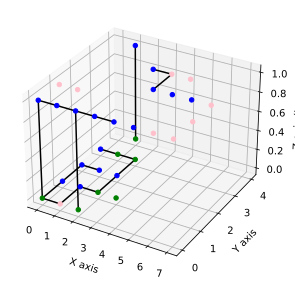

In [6]:
from Fusion import *
from Graph_State import *
from Compact_Graph_Dynamic import *
from Compact_Graph_Dynamic_List import *
from Compact_Graph_Dynamic_General import *
from Compact_Graph import *
from Validate import *
from Construct_Test_Circuit import *
from Determine_Dependency import *
from Partition import *
from Add_Round import *
from Z_Measure_Notify import *
from Generate_State import *
from JCZCircuit import *
import sys
import os

NQubit = 4
Depth = 10
MaxDegree = 4
StarStructure = False
DynamicSchedule = True
SpecialFusion = True
GeneralState = True

def to_undirected(gs):
    undirected_graph = nx.Graph()
    for nnode in gs.nodes():
        undirected_graph.add_node(nnode)
        if StarStructure or MaxDegree <= 4:
            undirected_graph.nodes[nnode]['phase'] = gs.nodes[nnode]['phase']
        else:
            if not GeneralState:
                undirected_graph.nodes[nnode]['phase'] = []
                undirected_graph.nodes[nnode]['phase'].append(gs.nodes[nnode]['phase'])
            else:
                undirected_graph.nodes[nnode]['phase'] = {}
                undirected_graph.nodes[nnode]['phase'][0] = []
                undirected_graph.nodes[nnode]['phase'][0].append(gs.nodes[nnode]['phase'])                
        # if not Generalized_Flow_Flag:
        if not DynamicSchedule:
            undirected_graph.nodes[nnode]['layer'] = gs.nodes[nnode]['layer']

    for edge in gs.edges():
        if edge not in undirected_graph.edges():
            undirected_graph.add_edge(edge[0], edge[1])
            undirected_graph[edge[0]][edge[1]]['con_qubits'] = {}
        if GeneralState:
            undirected_graph[edge[0]][edge[1]]['con_qubits'][edge[0]] = 1
            undirected_graph[edge[0]][edge[1]]['con_qubits'][edge[1]] = 1    
            # print("general state")
        else:
            undirected_graph[edge[0]][edge[1]]['con_qubits'][edge[0]] = 0
            undirected_graph[edge[0]][edge[1]]['con_qubits'][edge[1]] = 0                       
    return undirected_graph

def empty_folder(folder_path):
    if os.path.exists(folder_path):
        for item in os.listdir(folder_path):
            item_path = os.path.join(folder_path, item)
            if os.path.isfile(item_path):
                os.remove(item_path)
            elif os.path.isdir(item_path):
                empty_folder(item_path)
        print(f"Folder '{folder_path}' has been emptied.")
    else:
        print(f"Folder '{folder_path}' does not exist.")



def custom_main(gates_list, qubits, NxM, MaxDegree, prob):
    empty_folder("layers/")

    # generate graph state
    gs, input_nodes, colors = generate_graph_state(gates_list, qubits)
    
    if DynamicSchedule:
        # causal flow
        dgraph = determine_dependency(gs)
        print('-------------- \nBelow is determine_dependency result')
        plt.figure()
        nx.draw(dgraph)
        plt.title('generate graph state ----> determine_dependency')
        plt.savefig(f"saved_files/dgraph")
        plt.show()


        # gs = schedule(gs, dgraph)
        # gs = partition(gs, input_nodes)
        # pos = nx.get_node_attributes(gs, 'pos')
        undirected_graph = to_undirected(gs)
        print('-------------- \nBelow is undirected_graph result')
        plt.figure()
        nx.draw(undirected_graph)
        plt.title('generate graph state ----> undirected_graph')
        plt.savefig(f"saved_files/undirectedgraph")
        plt.show()
        # # generalized flow
        # if Generalized_Flow_Flag:
        #     undirected_graph = generalized_flow(undirected_graph, input_nodes)
        #     labels = {node: str(undirected_graph.nodes[node]['layer']) for node in undirected_graph.nodes()}
        #     nx.draw(undirected_graph, pos = pos, labels = labels, node_size = 30, font_size = 10)


        # fusion
        if GeneralState:
            # This does occur DELETE
            resource_state = generate_state(MaxDegree, prob=prob)
            fgraph = fusion_dynamic_general(undirected_graph, resource_state.copy())
            retry_counter = 0 
            while fgraph == -1:
                resource_state = generate_state(MaxDegree)
                fgraph = fusion_dynamic_general(undirected_graph, resource_state.copy())
                print(f"Retry #{retry_counter}") # DELETE
                retry_counter += 1                
        else:
            fgraph, added_nodes = fusion_graph_dynamic(undirected_graph, MaxDegree, StarStructure, SpecialFusion)
        
        print('--------------\nBelow is randomised resource_state ')
        nodes = sorted(resource_state.nodes())
        grid_side = int(len(nodes) ** 0.5)  # Determine the size of the grid
        pos = {node: (node % grid_side, node // grid_side) for node in nodes}
        plt.figure()
        nx.draw(resource_state,  pos=pos)
        plt.title(f'resource_state')
        plt.savefig(f"saved_files/resource_state")
        plt.show()


        print('--------------\nBelow undirected_graph + resource_state = fusion graph AKA pre_graph ')
        plt.figure()
        print(fgraph)
        nx.draw(fgraph)
        plt.title('fgraph')
        plt.savefig(f"saved_files/f_graph")
        plt.show()


        # add rounds
        # fgraph = add_round(fgraph, 1)
        
        # map and route
        if GeneralState:
            # print("Here #2") # DELETE
            print('--------------\nBelow fgraph & dgraph & rs input to map & route ')
            net_list , net_pos_list, net_colors_list = compact_graph_dynamic_general(fgraph, dgraph.copy(), resource_state, NxM)

        elif StarStructure or MaxDegree <= 4:
            net_list = compact_graph_dynamic(fgraph, dgraph, MaxDegree)
            print("Here #1 moot") # DELETE
        else:
            # if SpecialFusion:
            #     net_list = compact_graph_dynamic_list_special_fusion(fgraph, dgraph, MaxDegree)
            # else:
            net_list , net_pos_list, net_colors_list= compact_graph_dynamic_list(fgraph, dgraph, MaxDegree, SpecialFusion)
            print("Here #1 moot") # DELETE
    else:
        print("Here #1 moot") # DELETE
        gs = partition(gs, input_nodes)
        undirected_graph = to_undirected(gs)
        fgraph, added_nodes = fusion_graph(undirected_graph, MaxDegree, StarStructure)
        fgraph = add_round(fgraph, 1)
        net_list = compact_graph(fgraph, MaxDegree)
    
    if not GeneralState and not StarStructure:
        net_list = z_measure_notify(net_list, MaxDegree)
    # show result
    fusions = 0
    for net in net_list:
        fusions += len(list(net.edges()))
    print("fusion:", fusions)
    
    if GeneralState:
        validate_con_qubits_list(net_list, MaxDegree) 
    elif StarStructure or MaxDegree <= 4:
        validate_con_qubits(net_list, MaxDegree)
        fgraph = validate(net_list, fgraph, MaxDegree) 
    else:
        validate_con_qubits_list(net_list, MaxDegree)


    from mpl_toolkits.mplot3d import Axes3D

    # Set up 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Loop over each layer
    print(net_list)
    print(net_pos_list)
    print(net_colors_list)
    # Function to check if a green node can connect to any node directly above it
    def can_connect_above(node, node_z, above_colors, above_pos):
        # Get the position of the current node
        current_pos = net_pos_list[node_z][node]
        # Check if there's a node directly above with the same position
        for above_node, above_node_pos in above_pos.items():
            if above_node_pos == current_pos and above_colors[above_node] != 'gray':
                return True
        return False

    # Now in the main loop where you draw edges
    for z, (G, pos, colors) in enumerate(zip(net_list, net_pos_list, net_colors_list)):
        # Draw nodes but skip the gray ones
        for node, color in enumerate(colors):
            if color != 'gray':
                x, y = pos[node]
                ax.scatter(x, y, z, color=color)

        # Draw intralayer edges
        for edge in G.edges():
            if all(colors[node] != 'gray' for node in edge):
                x, y = zip(*[pos[n] for n in edge])
                ax.plot(x, y, zs=z, color='black')

        # Draw special interlayer connections for green nodes
        if z < len(net_list) - 1:  # Only proceed if there is a layer above
            for node, color in enumerate(colors):
                if color == 'green' and can_connect_above(node, z, net_colors_list[z + 1], net_pos_list[z + 1]):
                    x, y = pos[node]
                    above_x, above_y = net_pos_list[z + 1][node]
                    # Draw a vertical line from the green node to the node above
                    ax.plot([x, above_x], [y, above_y], [z, z + 1], color='black')

    # Set labels and show plot
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis (Layer)')
    plt.show()

    return

if __name__ == '__main__':
    nqubit = 4
    test_circuit = zx.Circuit(qubit_amount=nqubit)
    test_circuit.add_gate("HAD", 0)
    test_circuit.add_gate("T", 1)
    test_circuit.add_gate("CNOT", 2, 3)
    test_circuit.add_gate("CNOT", 1, 3)
    test_circuit.add_gate("CNOT", 0, 3)

    test_circuit = zx.Circuit.from_qasm_file('qasm_files/qf21_n15_transpiled_ori_modified.qasm')
    #test_circuit = zx.Circuit.from_qasm_file('qasm_files/debug_circuit_variational_n4_transpiled.qasmdebug_circuit_variational_n4_transpiled.qasm')

    jcz_circuit = pyZX_to_JCZ(test_circuit,test_circuit.qubits)

    """
    test_circuit.add_gate("ZPhase", 4, phase=0.75)
    jcz_circuit.add_J(4, phase=0.75)

    test_circuit.add_gate("X", 5)
    jcz_circuit.add_X(5)

    test_circuit.add_gate("Z", 6)
    jcz_circuit.add_Z(6)

    test_circuit.add_gate("S", 7)
    jcz_circuit.add_S(7)

    test_circuit.add_gate("RZ", 8, angle=2)
    jcz_circuit.add_Rz(8, phase=2)

    test_circuit.add_gate("CZ", 9,10)
    jcz_circuit.add_CZ(9,10)

    target_qubit = 11
    control_qubit = 12
    test_circuit.add_gate("H", target_qubit)
    test_circuit.add_gate("CNOT", control_qubit, target_qubit)
    test_circuit.add_gate("RZ", target_qubit, angle=2)
    test_circuit.add_gate("CNOT", control_qubit, target_qubit)
    test_circuit.add_gate("H", target_qubit)
    jcz_circuit.add_CRz(11,12,phase=2)
    """
    print('---------------------- \nBelow is the gate version of the circuit of interest')

    print('---------------------- \nBelow is the pyZX plot of the converted circuit')
    zx.draw(test_circuit)
    print( f"---------------------- \nBelow is the JCZ data (converted from circuit with {test_circuit.qubits} qubits) \n {jcz_circuit.gates}")
    
    NxM = 25, 25 
    print('---------------------- \nNow executing the optimisation on the JCZ... \n \n')
    custom_main(jcz_circuit.gates, test_circuit.qubits, NxM , 4 , prob=0)
 